<h1 style="color:purple;">Exploring Renewable Energy Consumption Across Various Economies</h1>

### Mini-Project by Siddarth Karuka

Data Source: https://www.kaggle.com/worldbank/world-development-indicators

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')

In [3]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


-----
<h4 style="color:purple;">
Since I'm interested in looking at Renewable Energy Consumption across various economies, I'll look for relavant indicators of economies such as classification by income 
    
---    
</h4>

In [4]:
countries = data[data['CountryName'].str.contains('[Ii]ncome')]
countries.CountryName.unique()

array(['East Asia & Pacific (all income levels)',
       'Europe & Central Asia (all income levels)', 'High income',
       'High income: nonOECD', 'High income: OECD',
       'Latin America & Caribbean (all income levels)',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa (all income levels)', 'Middle income',
       'Sub-Saharan Africa (all income levels)', 'Upper middle income'],
      dtype=object)

----
<h4 style="color:purple;">

I'll choose the following:
</h4>

* High income

* Middle income

* Low income

<h4 style="color:purple;">
    
I'll then investigate further into the High income countries; specifically I'll look if there's a difference between OECD and nonOECD countries

For more information on OECD, please read https://en.wikipedia.org/wiki/OECD
</h4>

<div>
    <b><u>OECD</u></b>
"The Organisation for Economic Co-operation and Development is an intergovernmental economic organisation with 36 member countries, founded in 1961 to stimulate economic progress and world trade..."

</div>

-----

In [5]:
countries_of_interest = ['Low income','Middle income','High income','High income: OECD','High income: nonOECD']

In [6]:
for country in countries_of_interest:
    print(data.CountryCode[data['CountryName']==country].unique())

['LIC']
['MIC']
['HIC']
['OEC']
['NOC']


----
<h4 style="color:purple;">

Now I'll look for an Indicator that relates to Renewable Energy Consumption:

</h4>

-----

In [7]:
print(data.IndicatorName[data.IndicatorName.str.contains('[Rr]enewable [Ee]nergy')].unique())

['Renewable energy consumption (% of total final energy consumption)']


----
<h4 style="color:purple;">

It's good that the value is already presented as a percentage of total final energy consumption, so it's ready for comparison. I'll first take a look at how they have changed over time in terms of percentage change from 1990
</h4>

-----

In [8]:
low_income_data = data[(data['CountryCode']=='LIC') & \
                       (data.IndicatorName.str.contains('Renewable energy consumption'))]

middle_income_data = data[(data['CountryCode']=='MIC') & \
                       (data.IndicatorName.str.contains('Renewable energy consumption'))]

high_income_data = data[(data['CountryCode']=='HIC') & \
                       (data.IndicatorName.str.contains('Renewable energy consumption'))]

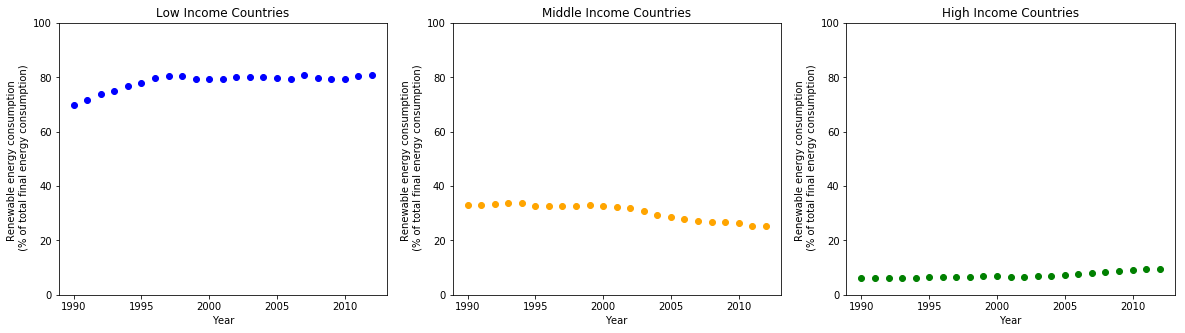

In [9]:
fig,ax = plt.subplots(1,3,figsize=(20, 5))

ax[0].scatter(low_income_data.Year,low_income_data.Value,color='blue')
ax[0].set(title='Low Income Countries',ylim=[0,100],xlabel='Year', \
          ylabel='Renewable energy consumption \n (% of total final energy consumption)')
ax[1].scatter(middle_income_data.Year,middle_income_data.Value,color='orange')
ax[1].set(title='Middle Income Countries',ylim=[0,100],xlabel='Year', \
          ylabel='Renewable energy consumption \n (% of total final energy consumption)')
ax[2].scatter(high_income_data.Year,high_income_data.Value,color='green')
ax[2].set(title='High Income Countries',ylim=[0,100],xlabel='Year', \
          ylabel='Renewable energy consumption \n (% of total final energy consumption)');

----
<h4 style="color:purple;">

This gives us a picture about how the contribution from renewable energy decreases as the income/economy increases.

I'll now zoom in and take a look at the percentage change in renewable energy contribution, from 1990 to 2012
</h4>

-----

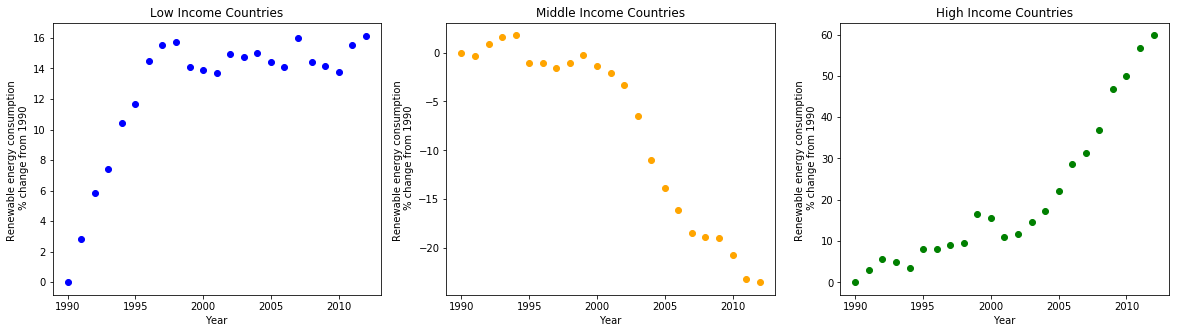

In [10]:
fig,ax = plt.subplots(1,3,figsize=(20, 5))
ax[0].scatter(low_income_data.Year,\
              (100*(low_income_data.Value - low_income_data.Value.iloc[0])/low_income_data.Value.iloc[0])\
             ,color='blue')
ax[0].set(title='Low Income Countries',xlabel='Year', \
          ylabel='Renewable energy consumption \n % change from 1990')
ax[1].scatter(middle_income_data.Year,\
              (100*(middle_income_data.Value - middle_income_data.Value.iloc[0])/middle_income_data.Value.iloc[0])\
             ,color='orange')
ax[1].set(title='Middle Income Countries',xlabel='Year', \
          ylabel='Renewable energy consumption \n % change from 1990')
ax[2].scatter(high_income_data.Year,\
              (100*(high_income_data.Value - high_income_data.Value.iloc[0])/high_income_data.Value.iloc[0])\
             ,color='green')
ax[2].set(title='High Income Countries',xlabel='Year', \
          ylabel='Renewable energy consumption \n % change from 1990');

---
<b>A possible theory:</b>
So it may be possible that when the economy is small (implying a small country), their needs might be met with whatever renewable energy sources were readily and easily available. That's why we can see a larger percentage contribution from renewable energy.

But as the economy starts to grow from low to middle income countries, may be the country needs more and more total energy and probably couldn't keep up with renewable energy. Also, this could probably explain why the percentage of renewable energy for middle income countries is lower than Low income countries, but higher than high income countries. 

Further when the countries start to grow from middle to high income countries, they are already meetings needs for high energy demands, but probably have the means to pursue renewable energy and thus keep increasing the contribution from renewable energy.

Again, this is all just a possible theory that could explain the data from my perspective. Further research and data analysis is required to make any conclusive remarks.

---
<h4 style="color:purple;">
I'll now look further into High Income countries, specifically if there's a difference in how OECD countries vs nonOECD countries use renewable energy.
</h4>

-----

In [11]:
high_income_OECD_data = data[(data['CountryCode']=='OEC') & \
                       (data.IndicatorName.str.contains('Renewable energy consumption'))]
high_income_nonOECD_data = data[(data['CountryCode']=='NOC') & \
                       (data.IndicatorName.str.contains('Renewable energy consumption'))]

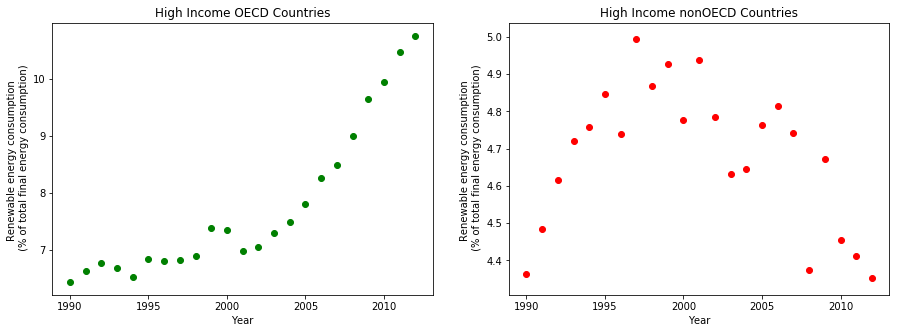

In [12]:
fig,ax = plt.subplots(1,2,figsize=(15, 5))

ax[0].scatter(high_income_OECD_data.Year,high_income_OECD_data.Value,color='green')
ax[0].set(title='High Income OECD Countries',xlabel='Year', \
          ylabel='Renewable energy consumption \n (% of total final energy consumption)')
ax[1].scatter(high_income_nonOECD_data.Year,high_income_nonOECD_data.Value,color='red')
ax[1].set(title='High Income nonOECD Countries',xlabel='Year', \
          ylabel='Renewable energy consumption \n (% of total final energy consumption)');

----
<h4 style="color:purple;">

It looks like High Income countries under OECD oraganization have been constantly increasing their energy usage from renewable energy sources where High Income countries that aren't part of the organization didn't seem to change much. It actually looks like they are back to 1990 levels in 2012
</h4>

---
<h3 style="color:green;">

CONCLUSION

It appears that there's some relation between economy and how countries are changing their views on adopting renewable energy sources. As a general trend, it appears that as the economy or income level increases, the percentage contribution from renewable energy decreases. In addition, there also seems to be, what I would call as, 'slabs' in which countries can behave differently. Such as low and high income countries were increasing their renewable energy contribution where as middle income were decreasing it over time.

Even among countries that are similarly ranked in economies, there could be several other factors that can be related to how the countries were changing their renewable energy contribution. For instance, being part of OECD correlates with increasing renewable energy usage contribution over time. However, it is to be noted that it is just a correlation and <span style="color:red;"> correlation does not imply causation</span>

</h3>

-----